<a href="https://colab.research.google.com/github/Mateusfcs/Data-Science/blob/main/Desafio_7_modelo_de_an%C3%A1lise_das_m%C3%A9tricas_RFV_MateusFernandesCarneiroDosSantos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto Você foi contratado por uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011. Com base nesses dados, você precisa agrupar os clientes em clusters com base em seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como: Clientes que compram os mesmos produtos; Clientes que possuem a mesma frequência de compras; Clientes que gastam mais dinheiro em suas compras. A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.Tips.png
# Nova seção
# Sobre os dados Acesse os dados aqui: https://www.kaggle.com/datasets/carrie1/ecommerce-data Os dados fornecidos possuem informações de transações de compras de uma loja de e-commerce em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.

# Atenção: as datas estão no formato MM/DD/YYYY HH:mm:ss; existem dados nulos que precisam ser tratados antes da realização da análise; por mais que os códigos de identificação sejam numéricos, o modelo não pode considerá-los como grandezas numéricas.

# Como começar? Desenvolva um modelo de clusterização que seja capaz de agrupar os clientes conforme o seu comportamento de compras levando em consideração o RFM calculado no desafio 4. Analise os clusters obtidos para identificar o perfil de cliente, como padrões e características em comum para determinar o seu comportamento de compra. Utilize gráficos e visualizações para auxiliar na análise. Não se esqueça de documentar cada etapa, justificando as escolhas realizadas. É essencial informar os insights obtidos e as recomendações de ações futuras para que a empresa possa colocá-los em prática. Boa sorte!

# Etapa 01) Análise exploratória dos dados
# Nova seção
a. Carregue a base de dados;

b. Realize uma descrição estatística dos dados;

c. Visualize as distribuições e identifique a relevância das colunas para a análise;

d. Verifique a presença de dados nulos, duplicados, outliers e demais inconsistências nos dados.
# **negrito**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer


In [12]:
dados = pd.read_csv('data.csv', encoding='unicode_escape')
print(dados.shape)
dados.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
dados.info();
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Verificando dados nulos
dados.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
137834      False      False        False     False        False      False   
137835      False      False        False     False        False      False   
137836      False      False        False     False        False      False   
137837      False      False        False     False        False      False   
137838      False      False        False      True         True     

In [14]:
#Analisandos dados duplicados
dados.InvoiceNo.sort_values()

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 541909, dtype: object

In [15]:
dados[['Description','Country']].nunique()

Description    4223
Country          38
dtype: int64

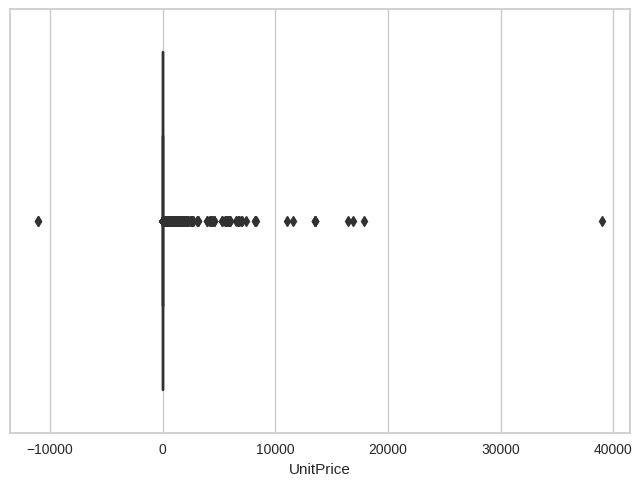

In [17]:
sns.boxplot(x=dados['UnitPrice'])
plt.show()

In [18]:
Q1 = dados['Quantity'].quantile(0.25)
Q3 = dados['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = dados[(dados['Quantity'] >= Q1 - 1.5 * IQR) & (dados['Quantity'] <= Q3 + 1.5 * IQR)]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [20]:
Q4 = dados['UnitPrice'].quantile(0.25)
Q5 = dados['UnitPrice'].quantile(0.75)
IQR = Q5 - Q4
df = dados[(dados['UnitPrice'] >= Q4 - 1.5 * IQR) & (dados['UnitPrice'] <= Q5 + 1.5 * IQR)]

In [23]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,502282.000000,502282.000000
mean,10.109227,2.522504
std,226.501200,1.917658
min,-80995.000000,0.000000
25%,1.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8.330000


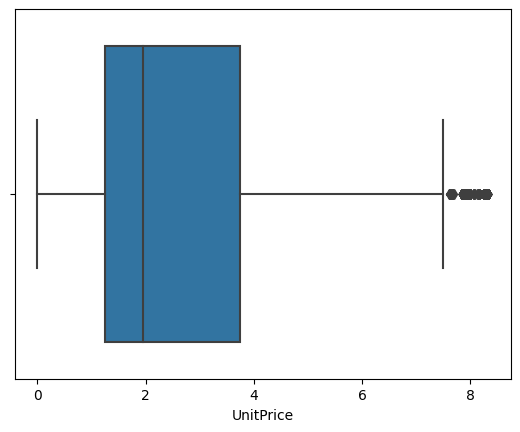

In [ ]:
sns.boxplot(x=df['UnitPrice'])
plt.show()

In [ ]:
# Tratamento de outliers para 'Quantity'
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
df = df[(df['Quantity'] >= Q1_quantity - 1.5 * IQR_quantity) & (df['Quantity'] <= Q3_quantity + 1.5 * IQR_quantity)]

# Tratamento de outliers para 'UnitPrice'
Q1_unitprice = df['UnitPrice'].quantile(0.25)
Q3_unitprice = df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice
df = df[(df['UnitPrice'] >= Q1_unitprice - 1.5 * IQR_unitprice) & (df['UnitPrice'] <= Q3_unitprice + 1.5 * IQR_unitprice)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


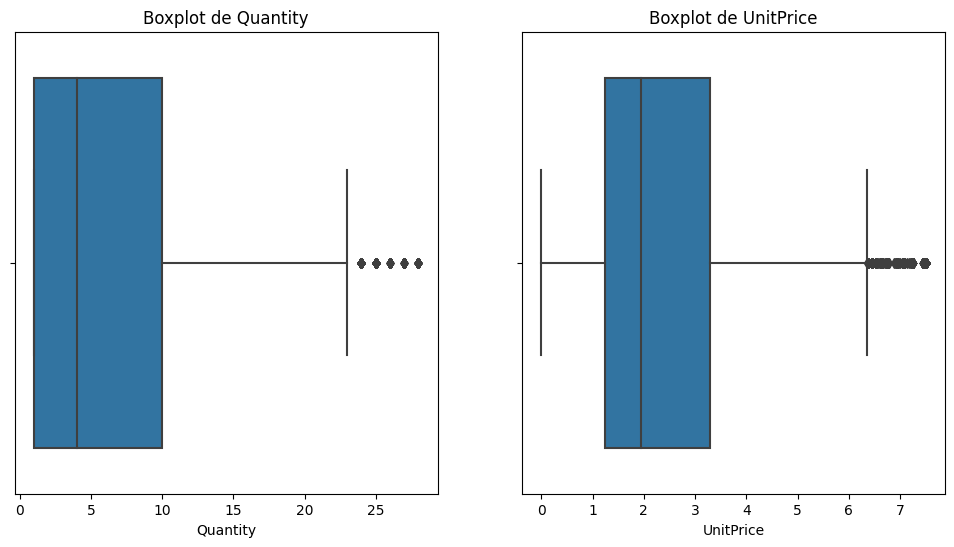

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]


# Criando boxplot para 'Quantity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity')

# Criando boxplot para 'UnitPrice'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')

plt.show()

In [25]:
df['price_total'] = df.Quantity * df.UnitPrice
df

<ipython-input-25-9389d2003834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_total'] = df.Quantity * df.UnitPrice


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [260]:
# Recencia, Frequencia e Valor (RFV)
pd.Timestamp.today()


Timestamp('2024-01-16 18:59:09.617073')

In [261]:
pd.Timestamp('2012-01-01')

Timestamp('2012-01-01 00:00:00')

In [262]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_rfv = (
    df.groupby('CustomerID')
    .agg(
        R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
        F = ('InvoiceNo', 'nunique'),
        M = ('price_total', 'mean')
    )
)
df_rfv

<ipython-input-262-774a1fbc0e6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,R,F,M
CustomerID,,,
12346.0,347,2,0.000000
12347.0,24,7,23.175852
12348.0,97,4,53.231111
12349.0,40,1,19.502273
12350.0,332,1,18.400000
...,...,...,...
18280.0,299,1,17.855556
18281.0,202,1,9.384000
18282.0,29,3,12.560000


<Axes: >

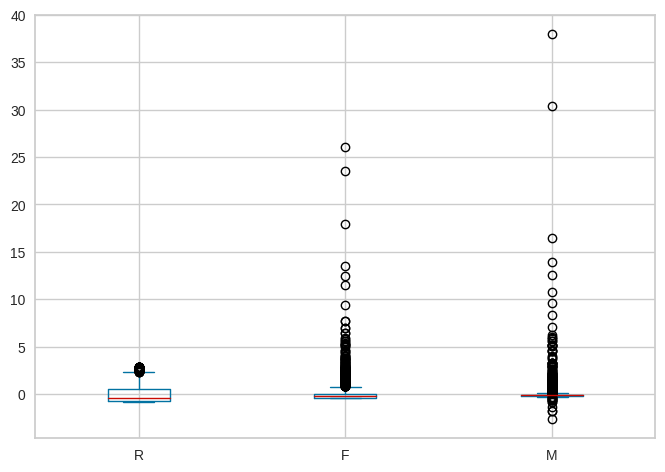

In [263]:
df_rfv.apply(scale).plot.box()

In [264]:
df_rfv.apply(scale).query('M<0')
df_rfv

,R,F,M
CustomerID,,,
12346.0,347,2,0.000000
12347.0,24,7,23.175852
12348.0,97,4,53.231111
12349.0,40,1,19.502273
12350.0,332,1,18.400000
...,...,...,...
18280.0,299,1,17.855556
18281.0,202,1,9.384000
18282.0,29,3,12.560000


In [265]:
#Transformando os dados
from sklearn.preprocessing import PowerTransformer

In [266]:
scaler = PowerTransformer()



In [267]:
df_rfv_scaled = pd.DataFrame(scaler.fit_transform(df_rfv), index=df_rfv.index, columns=df_rfv.columns)


In [268]:
df_rfv_scaled.head()

,R,F,M
CustomerID,,,
12346.0,1.598179,-0.318435,-0.476097
12347.0,-1.529957,1.064212,0.004055
12348.0,0.342452,0.512459,0.453779
12349.0,-0.778311,-1.210655,-0.058248
12350.0,1.560766,-1.210655,-0.077441


<Axes: >

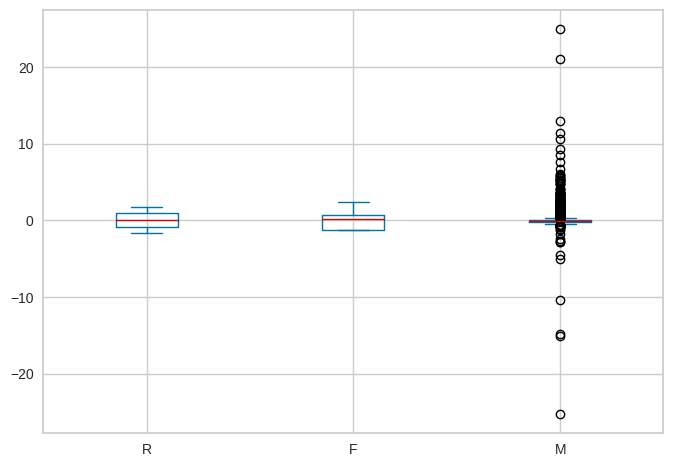

In [269]:
#Visualizando os dados transformados
df_rfv_scaled.plot.box()

In [270]:
#Transformando para array
scaler.inverse_transform(df_rfv_scaled)

array([[347.        ,   2.        ,   0.        ],
       [ 24.        ,   7.        ,  23.17585227],
       [ 97.        ,   4.        ,  53.23111111],
       ...,
       [ 29.        ,   3.        ,  12.56      ],
       [ 25.        ,  16.        ,   2.72869681],
       [ 64.        ,   3.        ,  26.13449275]])

In [271]:
df_rfv.describe()

,R,F,M
count,4340.000000,4340.000000,4340.000000
mean,113.494009,4.900000,29.139625
std,100.900594,8.933374,100.905478
min,22.000000,1.000000,-238.440000
25%,38.750000,1.000000,10.429423
50%,72.000000,3.000000,16.282054
75%,163.250000,5.000000,22.059985
max,395.000000,238.000000,3861.000000


In [272]:
import scipy

In [273]:
df_rfv_clip = df_rfv.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfv_clip.describe()

,R,F,M
count,4340.000000,4340.000000,4340.000000
mean,111.649965,4.164055,20.518909
std,96.303912,4.088365,18.913587
min,22.000000,1.000000,-238.440000
25%,38.750000,1.000000,10.429423
50%,72.000000,3.000000,16.282054
75%,163.250000,5.000000,22.059985
max,334.050000,16.000000,77.954343


In [274]:
df_rfv_clip_scaled = df_rfv_clip.apply(scale)
df_rfv_clip_scaled

,R,F,M
CustomerID,,,
12346.0,2.309622,-0.529382,-1.085002
12347.0,-0.910244,0.693742,0.140494
12348.0,-0.152140,-0.040132,1.729760
12349.0,-0.744084,-0.774006,-0.053758
12350.0,2.288333,-0.774006,-0.112044
...,...,...,...
18280.0,1.945628,-0.774006,-0.140833
18281.0,0.938284,-0.774006,-0.588793
18282.0,-0.858319,-0.284757,-0.420852


In [275]:
#Utilizando KMeans
from sklearn.cluster import KMeans
X = df.loc[:,['UnitPrice','Quantity']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

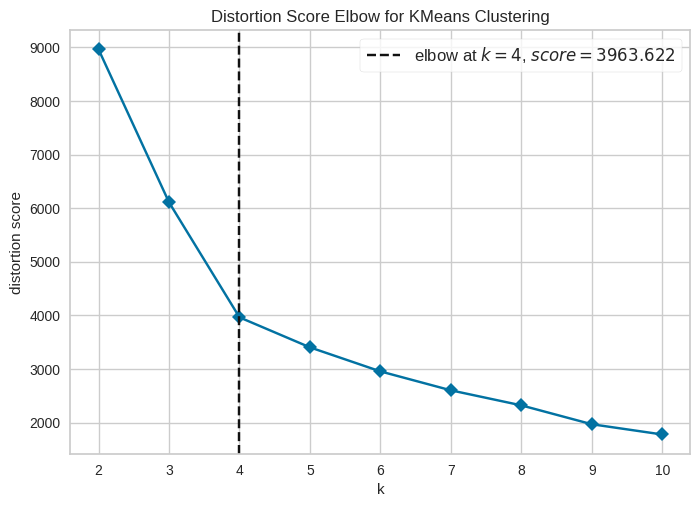

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [100]:
#Visualizando a curva de cotovelo
kelbow_visualizer(KMeans(), df_rfv_clip_scaled, k=10, timings=False)

In [103]:
#Criando lista de dicionarios

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfv_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k' : k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)


pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8959.572239,0.383162,1.043170,1965.957208
3,6108.538134,0.433513,0.901918,2453.533845
4,3963.629133,0.485592,0.706687,3302.399808
5,3404.271337,0.393723,0.843024,3061.193144
6,3046.772684,0.397266,0.754550,2837.371642
7,2603.194464,0.372858,0.871233,2889.791942
8,2322.421804,0.378804,0.870798,2850.595081
9,1970.306367,0.382626,0.803418,3036.090220
10,1772.868638,0.386105,0.765868,3052.239852


In [104]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfv_clip_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
#Plotando gráfico 3d para ver a distribuição dos clusters KMeans
px.scatter_3d(df_rfv_clip, x= 'R', y= 'F', z= 'M', color=kmeans_labels.astype(str), template='plotly_dark')

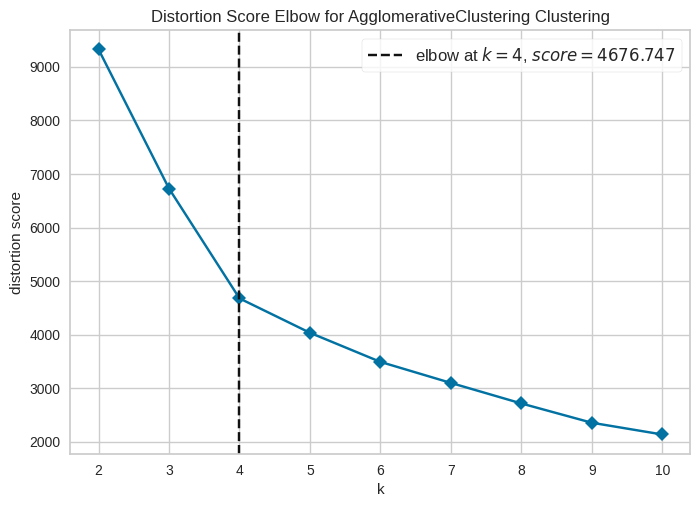

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [110]:
# Clusterização hierarquica
kelbow_visualizer(AgglomerativeClustering(), df_rfv_clip_scaled, k=10, timings=False)

In [ ]:
#Criando lista de dicionarios

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfv_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k' : k}
  #cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)


pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

In [156]:
#Plotando clusteres de clusterização hierarquica

hcluster = AgglomerativeClustering(n_clusters=4)
hcluster_labels = hcluster.fit_predict(df_rfv_clip_scaled)

In [158]:
px.scatter_3d(df_rfv_clip, x='R', y='F', z='M', color=hcluster_labels.astype(str), template='plotly_dark')

In [222]:
#Importando mais bibliotecas necessárias
from sklearn.cluster import DBSCAN
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.cluster import dbscan



In [223]:
#Clusterização com DBSCAN


df_rfv_clip_scaled

,R,F,M
CustomerID,,,
12346.0,2.309622,-0.529382,-1.085002
12347.0,-0.910244,0.693742,0.140494
12348.0,-0.152140,-0.040132,1.729760
12349.0,-0.744084,-0.774006,-0.053758
12350.0,2.288333,-0.774006,-0.112044
...,...,...,...
18280.0,1.945628,-0.774006,-0.140833
18281.0,0.938284,-0.774006,-0.588793
18282.0,-0.858319,-0.284757,-0.420852


In [312]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px

scaler = StandardScaler()
df_rfv_clip_scaled = scaler.fit_transform(df_rfv_scaled[['R', 'F', 'M']])

# Criando o modelo DBSCAN com eps ajustado para controlar densidade
modeloDB = DBSCAN(eps=0.33, min_samples=7)

# Ajustando o modelo e obtendo os rótulos
labels_dbscan = modeloDB.fit_predict(df_rfv_clip_scaled)

# Criando o gráfico 3D
fig = px.scatter_3d(df_rfv_clip, x='R', y='F', z='M', color=labels_dbscan.astype(str), template='plotly_dark')
fig.show()

# **A conclusão Final é entregar os algorítmos para a área de Marketing da empresa para analisar clusteres com perfil de cliente para tomada de decisão mais assertiva nas campanhas de marketing.**